<a href="https://colab.research.google.com/github/abhimanyu90/MLproject/blob/main/project3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@ Credit to [Meher Shashwat Nigam](https://www.linkedin.com/in/mehershashwatnigam/) ( Github: [ShashwatNigam99](https://github.com/ShashwatNigam99), Email: meher.shashwat@students.iiit.ac.in)

and [Alberto Tono](https://www.linkedin.com/in/albertotono3/) (Email: alberto.tono@cd.institute)

# Requirements and Setup
It will take a while to install all the dependencies and expect around 20min to run this demo on this Google Colab

In [1]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
%env FORCE_CUDA=1
!pip install -U torch==1.6 torchvision==0.7 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install pyyaml==5.1 pycocotools>=2.0.1
!pip install -U fvcore==0.1.3.post20210317
!pip install -U --force-reinstall iopath==0.1.6
!pip install 'git+https://github.com/facebookresearch/detectron2.git@4b539e41f4b19570bc6b722fa0f516f927cdae02'
!pip install 'git+https://github.com/facebookresearch/pytorch3d.git'

env: FORCE_CUDA=1
Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.6 (from versions: 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0)
ERROR: No matching distribution found for torch==1.6
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.4 MB/s eta 0:00:00

## Imports and checking installation parameters(python 3.6.9, cuda 10.1)

In [2]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available(),torch.cuda.device_count())
!gcc --version
!python --version
!nvcc --version
!nvidia-smi
!python -m detectron2.utils.collect_env

2.5.1+cu124 True 1
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Python 3.11.11
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
Thu Feb 20 06:07:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                     

## Installing meshrcnn
It will create a folder structure on your left in which you can navigate


In [3]:
!git clone https://github.com/facebookresearch/meshrcnn.git
!cd meshrcnn && pip install -e .

Cloning into 'meshrcnn'...
remote: Enumerating objects: 357, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 357 (delta 57), reused 106 (delta 47), pack-reused 214 (from 1)
Receiving objects: 100% (357/357), 192.94 KiB | 954.00 KiB/s, done.
Resolving deltas: 100% (144/144), done.
Obtaining file:///content/meshrcnn
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━

# Loading Pix3D Dataset
Also this import will take a while since it is loading the entire dataset 3.5GB


In [4]:
# pix3d data
!./meshrcnn/datasets/pix3d/download_pix3d.sh

--2025-02-20 06:09:10--  http://pix3d.csail.mit.edu/data/pix3d.zip
Resolving pix3d.csail.mit.edu (pix3d.csail.mit.edu)... 128.52.131.62
Connecting to pix3d.csail.mit.edu (pix3d.csail.mit.edu)|128.52.131.62|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3783261880 (3.5G) [application/zip]
Saving to: ‘pix3d.zip’

pix3d.zip           100%[===================>]   3.52G  25.3MB/s    in 1m 46s  

2025-02-20 06:10:56 (34.2 MB/s) - ‘pix3d.zip’ saved [3783261880/3783261880]

--2025-02-20 06:11:49--  https://dl.fbaipublicfiles.com/meshrcnn/pix3d/pix3d_s1_train.json
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.111, 13.226.210.25, 13.226.210.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4781155 (4.6M) [text/plain]
Saving to: ‘pix3d_s1_train.json’

pix3d_s1_train.json 100%[===================>]   4.56M  --.-KB/s    in 0.09s   

2025-02

In [44]:
from google.colab import files
uploaded = files.upload()  # import a sofa from your computer and name it test.jpg

Saving test12.jpg to test12.jpg


## Demo (Inference)

In [45]:

!python ./meshrcnn/demo/demo.py --config-file ./meshrcnn/configs/pix3d/meshrcnn_R50_FPN.yaml \
--input /content/test12.jpg --output output_demo --onlyhighest MODEL.WEIGHTS meshrcnn://meshrcnn_R50.pth

[02/20 07:26:51 demo]: Arguments: Namespace(config_file='./meshrcnn/configs/pix3d/meshrcnn_R50_FPN.yaml', input='/content/test12.jpg', output='output_demo', focal_length=20.0, onlyhighest=True, opts=['MODEL.WEIGHTS', 'meshrcnn://meshrcnn_R50.pth'])
/usr/local/lib/python3.11/dist-packages/fvcore/common/checkpoint.py:240: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend 

# Visualize the Picture Uploaded and the Segmentation Mask

In [49]:
filename = 'test12.jpg' #check the name is the same as the file you uploaded
maskname = '0_mask_wardrobe_1.000.png' # Make sure to change the file name with the appropriate mask change 'test/0_mask_sofa_1.000.png'

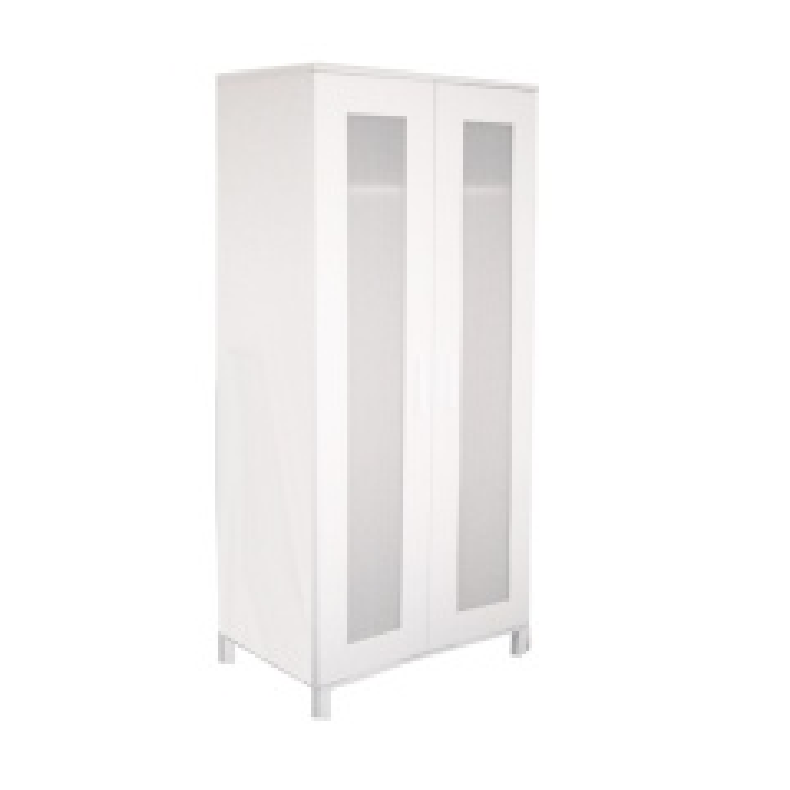

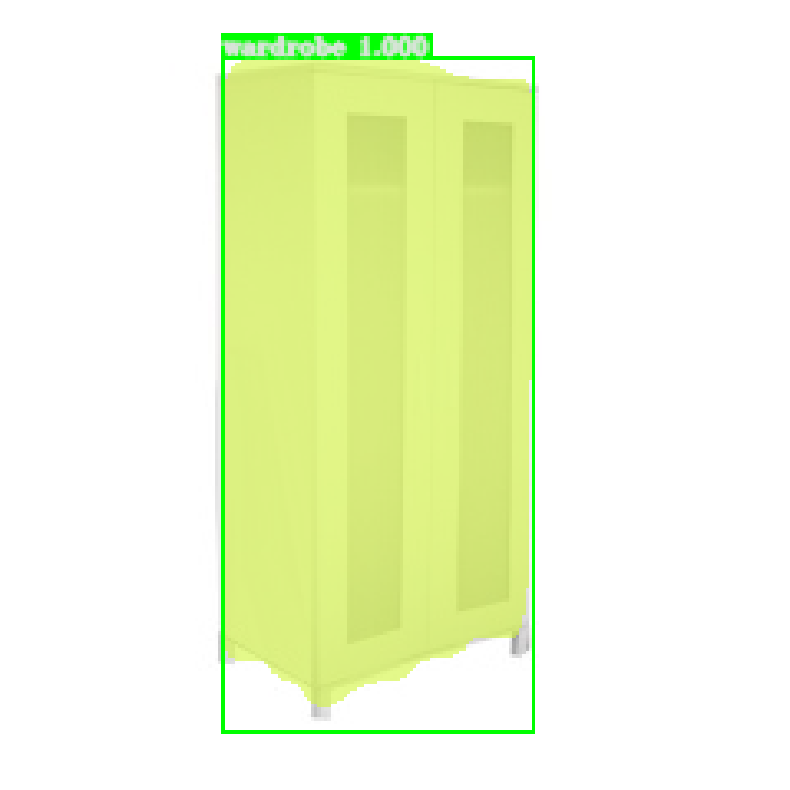

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

img = plt.imread("/content/" + filename)
plt.imshow(img)
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
img = plt.imread("/content/output_demo/test12/" + maskname)
plt.imshow(img)
plt.axis('off')
plt.show()

# Download the .obj file

In [53]:
name = 'wardrobe' # change file name accordingly

In [54]:
from google.colab import files
files.download('/content/output_demo/test12/0_mesh_'+ name + '_1.000.obj')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>